<a href="https://colab.research.google.com/github/6404062636412/Intelligent/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pandas as pd #การคาดการณ์ว่าลูกค้าจะซื้อสินค้าหรือไม่ 0 ไม่ 1 ซื้อ

df = pd.read_csv('incomplete_correlated_dataset.csv')
df

,Age,Education_Level,Income,Website_Visits,Purchase
0,56.0,High School,59474.0,6.0,1
1,46.0,Master,50249.0,NaN,1
2,32.0,High School,33918.0,4.0,0
3,25.0,Bachelor,29499.0,19.0,0
4,38.0,Master,40317.0,NaN,0
...,...,...,...,...,...
995,41.0,High School,42663.0,NaN,0
996,32.0,High School,34132.0,12.0,0
997,46.0,Master,48099.0,12.0,0
998,25.0,Master,NaN,20.0,0


In [ ]:
df.isnull().sum()

,0
Age,100
Education_Level,0
Income,100
Website_Visits,100
Purchase,0


In [ ]:
df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df["Income"].fillna(df["Income"].mean(), inplace=True)
df["Website_Visits"].fillna(df["Website_Visits"].mode()[0], inplace=True)

<ipython-input-4-2aac765ba030>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mode()[0], inplace=True)
<ipython-input-4-2aac765ba030>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.isnull().sum()

,0
Age,0
Education_Level,0
Income,0
Website_Visits,0
Purchase,0


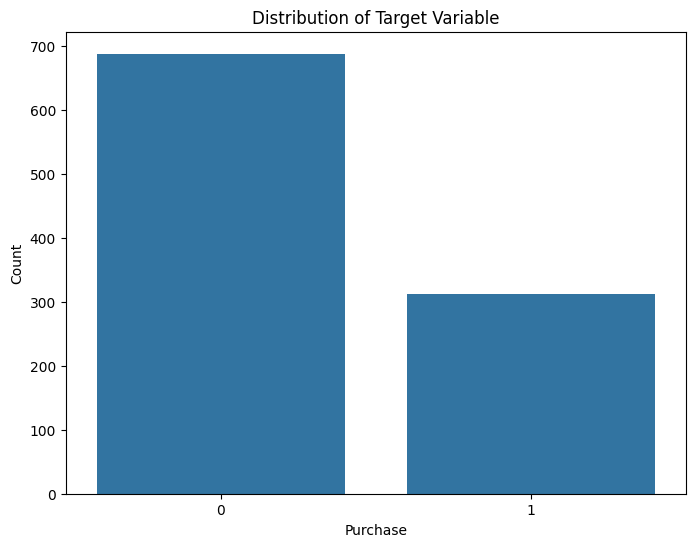

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Purchase', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.show()

In [ ]:
X = df[['Age', 'Income', 'Website_Visits']]
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       100
           1       0.89      1.00      0.94        50

    accuracy                           0.96       150
   macro avg       0.95      0.97      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
# prompt: export as pkl

import pickle

# Assuming 'model' is your trained LogisticRegression model
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
X_test

,Age,Income,Website_Visits
521,50.0,49083.0,21.0
737,34.0,36284.0,7.0
740,22.0,25037.0,9.0
660,39.0,41459.0,10.0
411,43.0,46453.0,16.0
...,...,...,...
914,47.0,50547.0,28.0
810,50.0,49359.0,16.0
244,22.0,24660.0,29.0
822,21.0,22779.0,28.0
